<a href="https://colab.research.google.com/github/deepjyotisaha85/eva4/blob/master/session12/S12_TinyImageNet_(LR-Finder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 12'
sys.path.append(workingdir)

In [3]:
%matplotlib inline
import torch
import torchvision
import numpy as np
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate
from utils import lrfinder
from utils import lr_rangetest
from utils import onecyclelr
from utils import gradcam 
from utils import gradvisualize 

  pip install torch-lr-finder -v --global-option="amp"


In [4]:
classes, trainloader, testloader = datapreparation.load('tinyimagenet', 70, batch_size=512, split=True, albumentations=True)


CUDA Available? True


shape: torch.Size([512, 3, 64, 64])


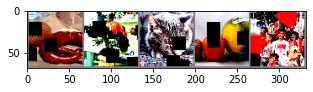

n07695742 n02791270 n02123045 n07768694 n04456115


In [5]:
display.show_random_images(trainloader, classes, 5)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18(num_classes=200)
model = net.to(device)
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


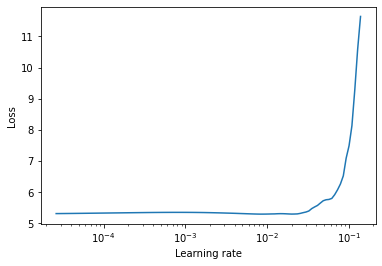

In [0]:
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3,verbose=True, min_lr=1e-5)

#lr_finder =lrfinder.LRFinder(model, optimizer, criterion, device=device)
#lr_finder.range_test(trainloader,testloader, start_lr=1e-5, end_lr=2, num_iter=len(trainloader), step_mode="exp")
#lr_finder.plot()
#lr_finder.reset()

In [0]:
#best_loss = lr_finder.best_loss
#best_lr = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
#print("Best Loss: %s\nBest Learning Rate: %s" % (best_loss, best_lr))

Best Loss: 5.28552729639345
Best Learning Rate: 0.008199949724922407


In [0]:
best_lr = 0.008199949724922407
optimizer = optim.SGD(model.parameters(), lr=best_lr, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3,verbose=True, min_lr=1e-5)

In [9]:
EPOCHS = 50
misclassified_imgs = []
correct_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
    training.train_model(model, device, trainloader, optimizer, scheduler, criterion, epoch)
    misclassified_imgs, correct_imgs = training.test_model(model, device, criterion, testloader, epoch==EPOCHS-1)

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.008199949724922407


Loss=4.458286762237549 Batch_id=150 Accuracy=5.03: 100%|██████████| 151/151 [05:43<00:00,  2.28s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 2518/33000 (7.63%)

EPOCH: 2 LR: 0.008199949724922407


Loss=4.021595001220703 Batch_id=150 Accuracy=12.51: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 4308/33000 (13.05%)

EPOCH: 3 LR: 0.008199949724922407


Loss=3.5954525470733643 Batch_id=150 Accuracy=17.75: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 5936/33000 (17.99%)

EPOCH: 4 LR: 0.008199949724922407


Loss=3.1840598583221436 Batch_id=150 Accuracy=22.38: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7184/33000 (21.77%)

EPOCH: 5 LR: 0.008199949724922407


Loss=3.1429758071899414 Batch_id=150 Accuracy=26.17: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7311/33000 (22.15%)

EPOCH: 6 LR: 0.008199949724922407


Loss=3.0286409854888916 Batch_id=150 Accuracy=29.05: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8094/33000 (24.53%)

EPOCH: 7 LR: 0.008199949724922407


Loss=2.747304677963257 Batch_id=150 Accuracy=31.77: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 9699/33000 (29.39%)

EPOCH: 8 LR: 0.008199949724922407


Loss=2.6515064239501953 Batch_id=150 Accuracy=34.49: 100%|██████████| 151/151 [05:54<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 9397/33000 (28.48%)

EPOCH: 9 LR: 0.008199949724922407


Loss=2.656338691711426 Batch_id=150 Accuracy=36.86: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 10657/33000 (32.29%)

EPOCH: 10 LR: 0.008199949724922407


Loss=2.628758430480957 Batch_id=150 Accuracy=39.02: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 10122/33000 (30.67%)

EPOCH: 11 LR: 0.008199949724922407


Loss=2.4526238441467285 Batch_id=150 Accuracy=40.82: 100%|██████████| 151/151 [05:54<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 11331/33000 (34.34%)

EPOCH: 12 LR: 0.008199949724922407


Loss=2.5622589588165283 Batch_id=150 Accuracy=42.96: 100%|██████████| 151/151 [05:54<00:00,  2.35s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 11801/33000 (35.76%)

EPOCH: 13 LR: 0.008199949724922407


Loss=2.390664577484131 Batch_id=150 Accuracy=44.37: 100%|██████████| 151/151 [05:54<00:00,  2.35s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 11833/33000 (35.86%)

EPOCH: 14 LR: 0.008199949724922407


Loss=2.2366061210632324 Batch_id=150 Accuracy=46.08: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 12360/33000 (37.45%)

EPOCH: 15 LR: 0.008199949724922407


Loss=2.076054096221924 Batch_id=150 Accuracy=47.51: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 12234/33000 (37.07%)

EPOCH: 16 LR: 0.008199949724922407


Loss=2.200357437133789 Batch_id=150 Accuracy=48.90: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 13255/33000 (40.17%)

EPOCH: 17 LR: 0.008199949724922407


Loss=1.8360475301742554 Batch_id=150 Accuracy=50.19: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 13860/33000 (42.00%)

EPOCH: 18 LR: 0.008199949724922407


Loss=2.3377017974853516 Batch_id=150 Accuracy=51.56: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 13904/33000 (42.13%)

EPOCH: 19 LR: 0.008199949724922407


Loss=2.0841405391693115 Batch_id=150 Accuracy=52.72: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 14333/33000 (43.43%)

EPOCH: 20 LR: 0.008199949724922407


Loss=1.8157060146331787 Batch_id=150 Accuracy=54.09: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 14024/33000 (42.50%)

EPOCH: 21 LR: 0.008199949724922407


Loss=1.811607837677002 Batch_id=150 Accuracy=55.44: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 14622/33000 (44.31%)

EPOCH: 22 LR: 0.008199949724922407


Loss=1.7347429990768433 Batch_id=150 Accuracy=56.63: 100%|██████████| 151/151 [05:52<00:00,  2.33s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 14865/33000 (45.05%)

EPOCH: 23 LR: 0.008199949724922407


Loss=1.882432460784912 Batch_id=150 Accuracy=57.80: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 13656/33000 (41.38%)

EPOCH: 24 LR: 0.008199949724922407


Loss=1.755994439125061 Batch_id=150 Accuracy=58.62: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 13859/33000 (42.00%)

EPOCH: 25 LR: 0.008199949724922407


Loss=1.5068941116333008 Batch_id=150 Accuracy=59.88: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 14678/33000 (44.48%)

EPOCH: 26 LR: 0.008199949724922407


Loss=1.5653953552246094 Batch_id=150 Accuracy=61.05: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 15032/33000 (45.55%)

EPOCH: 27 LR: 0.008199949724922407


Loss=1.5886996984481812 Batch_id=150 Accuracy=62.06: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 14572/33000 (44.16%)

EPOCH: 28 LR: 0.008199949724922407


Loss=1.3569297790527344 Batch_id=150 Accuracy=63.14: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 15353/33000 (46.52%)

EPOCH: 29 LR: 0.008199949724922407


Loss=1.4724235534667969 Batch_id=150 Accuracy=63.82: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 14701/33000 (44.55%)

EPOCH: 30 LR: 0.008199949724922407


Loss=1.2500780820846558 Batch_id=150 Accuracy=65.05: 100%|██████████| 151/151 [05:52<00:00,  2.33s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 15596/33000 (47.26%)

EPOCH: 31 LR: 0.008199949724922407


Loss=1.4330302476882935 Batch_id=150 Accuracy=66.25: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 15379/33000 (46.60%)

EPOCH: 32 LR: 0.008199949724922407


Loss=1.0799978971481323 Batch_id=150 Accuracy=67.26: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 15666/33000 (47.47%)

EPOCH: 33 LR: 0.008199949724922407


Loss=1.4655760526657104 Batch_id=150 Accuracy=68.16: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 15655/33000 (47.44%)

EPOCH: 34 LR: 0.008199949724922407


Loss=1.18402898311615 Batch_id=150 Accuracy=69.15: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 16094/33000 (48.77%)

EPOCH: 35 LR: 0.008199949724922407


Loss=1.2350316047668457 Batch_id=150 Accuracy=70.08: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 15020/33000 (45.52%)

EPOCH: 36 LR: 0.008199949724922407


Loss=1.084944486618042 Batch_id=150 Accuracy=71.04: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 15638/33000 (47.39%)

EPOCH: 37 LR: 0.008199949724922407


Loss=1.0808659791946411 Batch_id=150 Accuracy=72.25: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 16275/33000 (49.32%)

EPOCH: 38 LR: 0.008199949724922407


Loss=1.0597388744354248 Batch_id=150 Accuracy=73.25: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 15828/33000 (47.96%)

EPOCH: 39 LR: 0.008199949724922407


Loss=1.0501999855041504 Batch_id=150 Accuracy=74.02: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 15571/33000 (47.18%)

EPOCH: 40 LR: 0.008199949724922407


Loss=1.0176470279693604 Batch_id=150 Accuracy=75.07: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 16434/33000 (49.80%)

EPOCH: 41 LR: 0.008199949724922407


Loss=0.9928069114685059 Batch_id=150 Accuracy=76.21: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 16287/33000 (49.35%)

EPOCH: 42 LR: 0.008199949724922407


Loss=1.0872119665145874 Batch_id=150 Accuracy=77.09: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 16175/33000 (49.02%)

EPOCH: 43 LR: 0.008199949724922407


Loss=0.7699302434921265 Batch_id=150 Accuracy=77.92: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 16425/33000 (49.77%)

EPOCH: 44 LR: 0.008199949724922407


Loss=0.8768285512924194 Batch_id=150 Accuracy=78.69: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 16375/33000 (49.62%)

EPOCH: 45 LR: 0.008199949724922407


Loss=0.7053813338279724 Batch_id=150 Accuracy=79.67: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 16378/33000 (49.63%)

EPOCH: 46 LR: 0.008199949724922407


Loss=0.7644598484039307 Batch_id=150 Accuracy=80.81: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 15789/33000 (47.85%)

EPOCH: 47 LR: 0.008199949724922407


Loss=0.7213453650474548 Batch_id=150 Accuracy=81.62: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 16711/33000 (50.64%)

EPOCH: 48 LR: 0.008199949724922407


Loss=0.7206647396087646 Batch_id=150 Accuracy=82.69: 100%|██████████| 151/151 [05:53<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 16446/33000 (49.84%)

EPOCH: 49 LR: 0.008199949724922407


Loss=0.8037872910499573 Batch_id=150 Accuracy=82.90: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 16271/33000 (49.31%)

EPOCH: 50 LR: 0.008199949724922407


Loss=0.48741617798805237 Batch_id=150 Accuracy=84.00: 100%|██████████| 151/151 [05:52<00:00,  2.34s/it]



Test set: Average loss: 0.0049, Accuracy: 16043/33000 (48.62%)



In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 48 %


Gradcam

In [11]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = gradvisualize.VisualizeCam(model, classes, target_layers)
print (viz_cam)

In [0]:
#len(testloader.dataset)
print(misclassified_imgs[0]["img"])

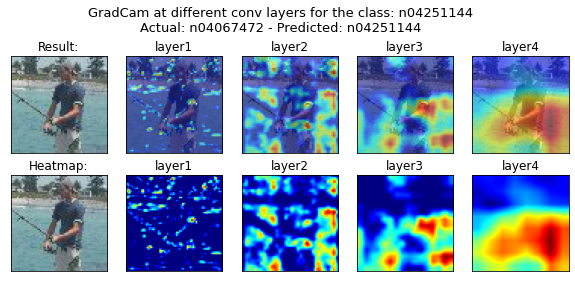

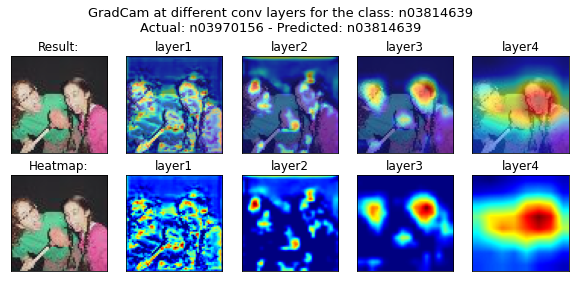

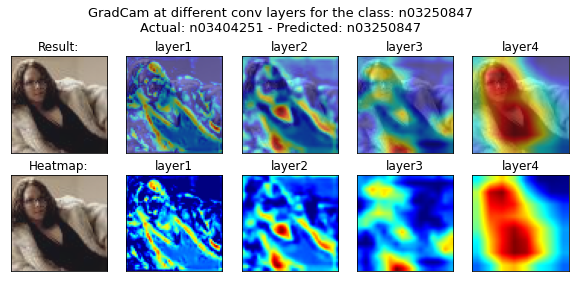

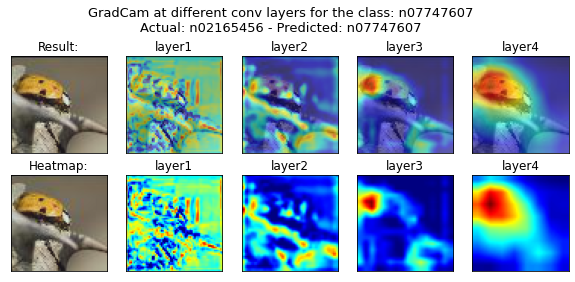

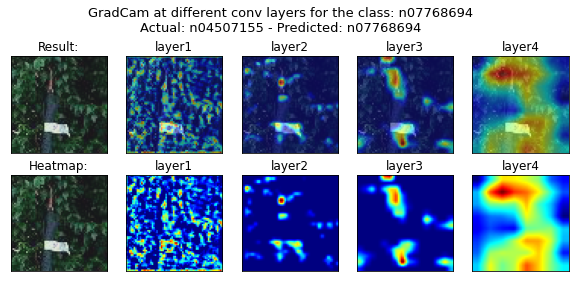

In [13]:
num_img = 5
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
  #incorrect_pred_imgs
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")

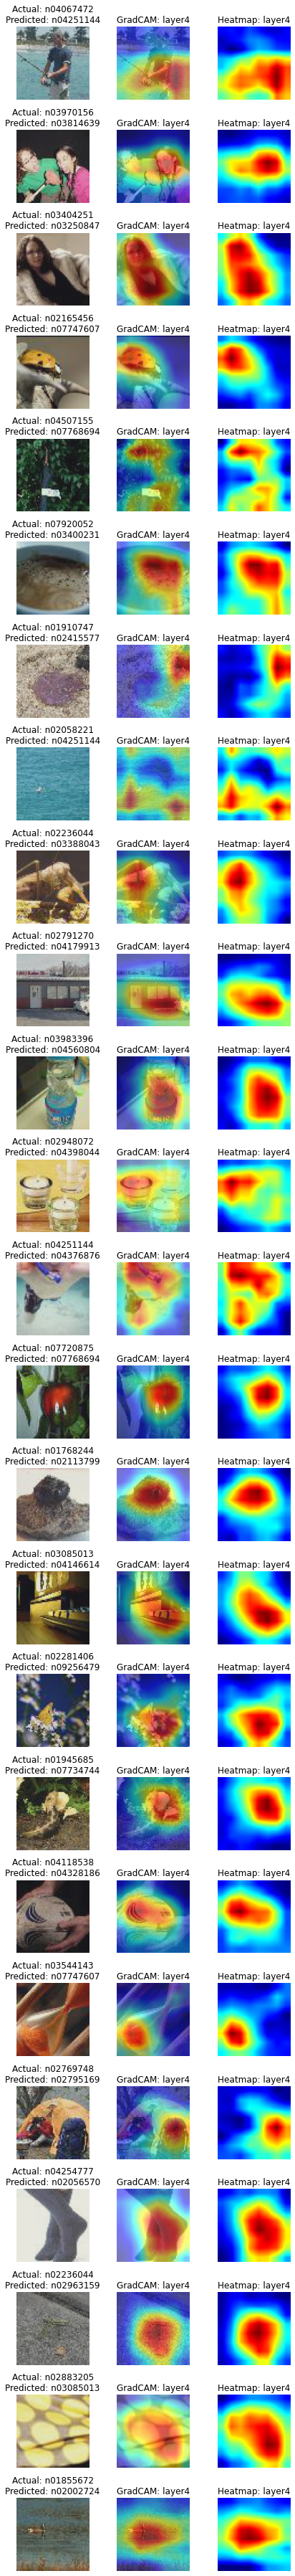

In [14]:
num_img = 25
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect", per_image=False)